# Set Parameter
- Attention = True
- Teacher Forcing Ratio = 0.5
- Layer = 1
- Batch size = 128
- Learning rate = 0.001
- Hidden unit = 200
- Epochs = 100
- N = 50
- Data Length = 100K
- Data = [single_Ctype4_error_rate_1]
- Deduplication
- Random split

# Import packages

import useful packages for experiments

In [1]:
import os
import argparse
import logging
import sys
import json
import numpy as np

import torch
from torch.optim.lr_scheduler import StepLR
import torchtext

os.environ["CUDA_VISIBLE_DEVICES"]="3"
os.chdir(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))))))

from models.trainer import Trainer
from models.seq2seq import Seq2seq
from loss.loss import Perplexity
from dataset import fields

import matplotlib.pyplot as plt

# Log format

In [2]:
log_level = 'info'
LOG_FORMAT = '%(asctime)s %(levelname)-6s %(message)s'
logging.basicConfig(format=LOG_FORMAT, level=getattr(logging, log_level.upper()))

In [3]:
character_accuracy = []
sentence_accuracy = []
f1_score = []
best_f1_score = []
rnn = "lstm"
data_name = "palindrome"
dir_name = "separator_Ctype4_30"
pretrained_dir_name = "separator_Ctype4_60"
iterator = list(range(1,11,1))
epochs = 200

train_path = "data/"+data_name+"_rand/correction_"+dir_name+"/data_train.txt"
dev_path = "data/"+data_name+"_rand/correction_"+dir_name+"/data_test.txt"
config_path = "models/config.json"

# Prepare dataset

rnn : lstm
src vocab size = 7
tat vacab size = 10


/root/venv/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
2020-03-18 07:48:13,528 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


/root/venv/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
2020-03-18 07:49:05,930 INFO   Finished epoch 1: Train loss: 2.7804, Dev loss: 2.2901, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 07:50:01,265 INFO   Finished epoch 2: Train loss: 2.1487, Dev loss: 2.2629, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0001
2020-03-18 07:50:56,906 INFO   Finished epoch 3: Train loss: 2.0655, Dev loss: 2.2389, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 07:51:49,339 INFO   Finished epoch 4: Train loss: 2.0122, Dev loss: 2.1507, Accuracy(character): 0.7878, Accuracy(sentence): 0.0000, F1 Score: 0.0005
2020-03-18 07:52:44,919 INFO   Finished epoch 5: Train loss: 1.9229, Dev loss: 2.1075, Accuracy(character): 0.7877, Accuracy(sentence): 0.00

early stopping..
rnn : lstm


2020-03-18 08:31:57,186 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 08:32:52,015 INFO   Finished epoch 1: Train loss: 2.8137, Dev loss: 2.3730, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 08:33:46,976 INFO   Finished epoch 2: Train loss: 2.1853, Dev loss: 2.2285, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 08:34:39,715 INFO   Finished epoch 3: Train loss: 2.0459, Dev loss: 2.1879, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 08:35:34,353 INFO   Finished epoch 4: Train loss: 2.0060, Dev loss: 2.1420, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0018
2020-03-18 08:36:29,260 INFO   Finished epoch 5: Train loss: 1.9559, Dev loss: 2.1866, Accuracy(character): 0.7814, Accuracy(sentence): 0.0000, F1 Score: 0.0337
2020-03-18 08:37:24,495 INFO   Finished epoch 6: Train loss: 1.9768, Dev loss: 2.0524, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 08:38:19,206 INFO   Fin

2020-03-18 09:19:17,682 INFO   Finished epoch 52: Train loss: 1.0019, Dev loss: 1.0004, Accuracy(character): 0.9999, Accuracy(sentence): 0.9976, F1 Score: 0.9997
2020-03-18 09:20:13,773 INFO   Finished epoch 53: Train loss: 1.0051, Dev loss: 1.0004, Accuracy(character): 0.9999, Accuracy(sentence): 0.9971, F1 Score: 0.9997
2020-03-18 09:21:07,008 INFO   Finished epoch 54: Train loss: 1.0095, Dev loss: 1.0185, Accuracy(character): 0.9979, Accuracy(sentence): 0.9728, F1 Score: 0.9946
2020-03-18 09:22:01,476 INFO   Finished epoch 55: Train loss: 1.0054, Dev loss: 1.0005, Accuracy(character): 0.9998, Accuracy(sentence): 0.9961, F1 Score: 0.9995
2020-03-18 09:22:56,553 INFO   Finished epoch 56: Train loss: 1.0224, Dev loss: 1.0026, Accuracy(character): 0.9992, Accuracy(sentence): 0.9880, F1 Score: 0.9981
2020-03-18 09:23:52,582 INFO   Finished epoch 57: Train loss: 1.0071, Dev loss: 1.0002, Accuracy(character): 1.0000, Accuracy(sentence): 0.9992, F1 Score: 0.9999
2020-03-18 09:24:48,353 INFO

early stopping..
rnn : lstm


2020-03-18 09:33:03,812 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 09:33:58,953 INFO   Finished epoch 1: Train loss: 2.8102, Dev loss: 2.3014, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:34:54,555 INFO   Finished epoch 2: Train loss: 2.1139, Dev loss: 2.2068, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:35:47,479 INFO   Finished epoch 3: Train loss: 2.0462, Dev loss: 2.2055, Accuracy(character): 0.7846, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:36:42,218 INFO   Finished epoch 4: Train loss: 2.0050, Dev loss: 2.1017, Accuracy(character): 0.7874, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:37:37,174 INFO   Finished epoch 5: Train loss: 1.9839, Dev loss: 2.0390, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:38:32,261 INFO   Finished epoch 6: Train loss: 1.9395, Dev loss: 2.1145, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 09:39:22,649 INFO   Fin

2020-03-18 10:20:30,471 INFO   Finished epoch 52: Train loss: 1.0028, Dev loss: 1.0000, Accuracy(character): 1.0000, Accuracy(sentence): 0.9999, F1 Score: 1.0000
2020-03-18 10:21:20,298 INFO   Finished epoch 53: Train loss: 1.0002, Dev loss: 1.0000, Accuracy(character): 1.0000, Accuracy(sentence): 0.9999, F1 Score: 1.0000
2020-03-18 10:22:14,926 INFO   Finished epoch 54: Train loss: 1.0001, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9998, F1 Score: 1.0000


early stopping..
rnn : lstm


2020-03-18 10:22:16,665 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 10:23:06,622 INFO   Finished epoch 1: Train loss: 2.6764, Dev loss: 2.2824, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:24:01,616 INFO   Finished epoch 2: Train loss: 2.1298, Dev loss: 2.2838, Accuracy(character): 0.7872, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:24:55,696 INFO   Finished epoch 3: Train loss: 2.1154, Dev loss: 2.2302, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:25:50,515 INFO   Finished epoch 4: Train loss: 2.0825, Dev loss: 2.1538, Accuracy(character): 0.7875, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:26:45,038 INFO   Finished epoch 5: Train loss: 2.0213, Dev loss: 2.1356, Accuracy(character): 0.7867, Accuracy(sentence): 0.0000, F1 Score: 0.0013
2020-03-18 10:27:40,060 INFO   Finished epoch 6: Train loss: 1.9826, Dev loss: 2.1409, Accuracy(character): 0.7871, Accuracy(sentence): 0.0000, F1 Score: 0.0072
2020-03-18 10:28:35,028 INFO   Fin

early stopping..
rnn : lstm


2020-03-18 10:53:12,054 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 10:54:07,559 INFO   Finished epoch 1: Train loss: 2.8155, Dev loss: 2.3287, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:55:02,240 INFO   Finished epoch 2: Train loss: 2.1667, Dev loss: 2.2255, Accuracy(character): 0.7878, Accuracy(sentence): 0.0000, F1 Score: 0.0004
2020-03-18 10:55:56,875 INFO   Finished epoch 3: Train loss: 2.0828, Dev loss: 2.1867, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:56:52,559 INFO   Finished epoch 4: Train loss: 2.0116, Dev loss: 2.1362, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:57:47,277 INFO   Finished epoch 5: Train loss: 2.0163, Dev loss: 2.1344, Accuracy(character): 0.7870, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 10:58:38,926 INFO   Finished epoch 6: Train loss: 1.9194, Dev loss: 2.1058, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0002
2020-03-18 10:59:33,675 INFO   Fin

2020-03-18 11:40:42,400 INFO   Finished epoch 52: Train loss: 1.0105, Dev loss: 1.0089, Accuracy(character): 0.9971, Accuracy(sentence): 0.9571, F1 Score: 0.9930
2020-03-18 11:41:33,134 INFO   Finished epoch 53: Train loss: 1.0244, Dev loss: 1.0452, Accuracy(character): 0.9893, Accuracy(sentence): 0.8925, F1 Score: 0.9725
2020-03-18 11:42:28,103 INFO   Finished epoch 54: Train loss: 1.0149, Dev loss: 1.0277, Accuracy(character): 0.9938, Accuracy(sentence): 0.9351, F1 Score: 0.9833
2020-03-18 11:43:23,036 INFO   Finished epoch 55: Train loss: 1.0060, Dev loss: 1.0052, Accuracy(character): 0.9986, Accuracy(sentence): 0.9769, F1 Score: 0.9964
2020-03-18 11:44:17,695 INFO   Finished epoch 56: Train loss: 1.0283, Dev loss: 1.0029, Accuracy(character): 0.9993, Accuracy(sentence): 0.9888, F1 Score: 0.9982
2020-03-18 11:45:12,590 INFO   Finished epoch 57: Train loss: 1.0752, Dev loss: 1.0223, Accuracy(character): 0.9941, Accuracy(sentence): 0.9118, F1 Score: 0.9857
2020-03-18 11:46:06,496 INFO

early stopping..
rnn : lstm


2020-03-18 12:04:22,613 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 12:05:17,950 INFO   Finished epoch 1: Train loss: 2.8129, Dev loss: 2.6127, Accuracy(character): 0.7559, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 12:06:12,712 INFO   Finished epoch 2: Train loss: 2.1616, Dev loss: 2.2327, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 12:07:07,746 INFO   Finished epoch 3: Train loss: 2.1453, Dev loss: 2.1999, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 12:08:02,792 INFO   Finished epoch 4: Train loss: 2.0586, Dev loss: 2.1333, Accuracy(character): 0.7878, Accuracy(sentence): 0.0000, F1 Score: 0.0001
2020-03-18 12:08:57,981 INFO   Finished epoch 5: Train loss: 1.9627, Dev loss: 2.1301, Accuracy(character): 0.7865, Accuracy(sentence): 0.0000, F1 Score: 0.0120
2020-03-18 12:09:50,158 INFO   Finished epoch 6: Train loss: 1.9484, Dev loss: 2.1062, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0009
2020-03-18 12:10:44,942 INFO   Fin

early stopping..
rnn : lstm


2020-03-18 12:41:41,712 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 12:42:36,457 INFO   Finished epoch 1: Train loss: 2.8812, Dev loss: 2.2628, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 12:43:31,800 INFO   Finished epoch 2: Train loss: 2.1529, Dev loss: 2.2295, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 12:44:25,483 INFO   Finished epoch 3: Train loss: 2.0884, Dev loss: 2.1693, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 12:45:20,885 INFO   Finished epoch 4: Train loss: 2.0281, Dev loss: 2.1392, Accuracy(character): 0.7870, Accuracy(sentence): 0.0000, F1 Score: 0.0073
2020-03-18 12:46:16,562 INFO   Finished epoch 5: Train loss: 1.9916, Dev loss: 2.0949, Accuracy(character): 0.7875, Accuracy(sentence): 0.0000, F1 Score: 0.0026
2020-03-18 12:47:11,501 INFO   Finished epoch 6: Train loss: 1.9434, Dev loss: 2.0337, Accuracy(character): 0.7874, Accuracy(sentence): 0.0000, F1 Score: 0.0040
2020-03-18 12:48:00,421 INFO   Fin

early stopping..
rnn : lstm


2020-03-18 13:18:57,917 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 13:19:53,010 INFO   Finished epoch 1: Train loss: 2.7101, Dev loss: 2.2487, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 13:20:45,263 INFO   Finished epoch 2: Train loss: 2.1033, Dev loss: 2.1702, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 13:21:40,578 INFO   Finished epoch 3: Train loss: 2.0098, Dev loss: 2.1507, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 13:22:34,887 INFO   Finished epoch 4: Train loss: 1.9821, Dev loss: 2.0723, Accuracy(character): 0.7855, Accuracy(sentence): 0.0005, F1 Score: 0.0034
2020-03-18 13:23:29,842 INFO   Finished epoch 5: Train loss: 1.8954, Dev loss: 2.1482, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0001
2020-03-18 13:24:25,431 INFO   Finished epoch 6: Train loss: 1.8482, Dev loss: 2.0160, Accuracy(character): 0.7851, Accuracy(sentence): 0.0002, F1 Score: 0.0174
2020-03-18 13:25:20,662 INFO   Fin

2020-03-18 14:06:15,371 INFO   Finished epoch 52: Train loss: 1.0074, Dev loss: 1.0452, Accuracy(character): 0.9943, Accuracy(sentence): 0.9501, F1 Score: 0.9842
2020-03-18 14:07:10,651 INFO   Finished epoch 53: Train loss: 1.0166, Dev loss: 1.0991, Accuracy(character): 0.9883, Accuracy(sentence): 0.8964, F1 Score: 0.9672
2020-03-18 14:08:04,719 INFO   Finished epoch 54: Train loss: 1.0499, Dev loss: 1.0037, Accuracy(character): 0.9993, Accuracy(sentence): 0.9885, F1 Score: 0.9981
2020-03-18 14:08:59,478 INFO   Finished epoch 55: Train loss: 1.0280, Dev loss: 1.0971, Accuracy(character): 0.9899, Accuracy(sentence): 0.9141, F1 Score: 0.9719
2020-03-18 14:09:54,567 INFO   Finished epoch 56: Train loss: 1.0103, Dev loss: 1.0950, Accuracy(character): 0.9906, Accuracy(sentence): 0.9196, F1 Score: 0.9736
2020-03-18 14:10:49,550 INFO   Finished epoch 57: Train loss: 1.0438, Dev loss: 1.0006, Accuracy(character): 0.9999, Accuracy(sentence): 0.9973, F1 Score: 0.9997
2020-03-18 14:11:43,860 INFO

early stopping..
rnn : lstm


2020-03-18 14:32:50,716 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 14:33:43,459 INFO   Finished epoch 1: Train loss: 2.7169, Dev loss: 2.2793, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 14:34:38,405 INFO   Finished epoch 2: Train loss: 2.1324, Dev loss: 2.2655, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 14:35:33,756 INFO   Finished epoch 3: Train loss: 2.0535, Dev loss: 2.2220, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 14:36:28,373 INFO   Finished epoch 4: Train loss: 2.0216, Dev loss: 2.5296, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 14:37:23,929 INFO   Finished epoch 5: Train loss: 1.9891, Dev loss: 2.0941, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 14:38:18,962 INFO   Finished epoch 6: Train loss: 1.9398, Dev loss: 2.2417, Accuracy(character): 0.7588, Accuracy(sentence): 0.0000, F1 Score: 0.0967
2020-03-18 14:39:14,019 INFO   Fin

2020-03-18 15:20:18,134 INFO   Finished epoch 52: Train loss: 1.0043, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9995, F1 Score: 0.9999
2020-03-18 15:21:13,139 INFO   Finished epoch 53: Train loss: 1.0004, Dev loss: 1.0001, Accuracy(character): 0.9999, Accuracy(sentence): 0.9986, F1 Score: 0.9998
2020-03-18 15:22:08,084 INFO   Finished epoch 54: Train loss: 1.0010, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9992, F1 Score: 0.9999
2020-03-18 15:23:02,584 INFO   Finished epoch 55: Train loss: 1.0002, Dev loss: 1.0001, Accuracy(character): 0.9999, Accuracy(sentence): 0.9989, F1 Score: 0.9999
2020-03-18 15:23:57,320 INFO   Finished epoch 56: Train loss: 1.0019, Dev loss: 1.0001, Accuracy(character): 1.0000, Accuracy(sentence): 0.9990, F1 Score: 0.9999
2020-03-18 15:24:52,652 INFO   Finished epoch 57: Train loss: 1.0342, Dev loss: 1.0000, Accuracy(character): 1.0000, Accuracy(sentence): 0.9997, F1 Score: 1.0000
2020-03-18 15:25:47,953 INFO

early stopping..
rnn : lstm


2020-03-18 15:27:38,774 INFO   Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
), Scheduler: None


src vocab size = 7
tat vacab size = 10
Train_path : data/palindrome_rand/correction_separator_Ctype4_30/data_train.txt
Dev_path = data/palindrome_rand/correction_separator_Ctype4_30/data_test.txt
{
    "max_len": 65,
    "embedding_size": 20,
    "hidden_size": 100,
    "input_dropout_p": 0,
    "dropout_p": 0,
    "n_layers": 1,
    "bidirectional": false,
    "rnn_cell": "lstm",
    "variable_lengths": true,
    "embedding": null,
    "update_embedding": true,
    "get_context_vector": false,
    "use_attention": true,
    "attn_layers": 1,
    "hard_attn": false,
    "position_embedding": "length",
    "pos_add": "add",
    "use_memory": "queue",
    "memory_dim": 5
}
Save_path : palindrome_rand_separator_Ctype4_30_att_with_pos_length_use_queue_emb20_hidden100_pretrained


2020-03-18 15:28:33,796 INFO   Finished epoch 1: Train loss: 2.8179, Dev loss: 2.3240, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 15:29:29,253 INFO   Finished epoch 2: Train loss: 2.1247, Dev loss: 2.2231, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 15:30:24,207 INFO   Finished epoch 3: Train loss: 2.0721, Dev loss: 2.1508, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0000
2020-03-18 15:31:19,068 INFO   Finished epoch 4: Train loss: 1.9989, Dev loss: 2.0903, Accuracy(character): 0.7879, Accuracy(sentence): 0.0000, F1 Score: 0.0027
2020-03-18 15:32:14,015 INFO   Finished epoch 5: Train loss: 1.9578, Dev loss: 2.0169, Accuracy(character): 0.7877, Accuracy(sentence): 0.0000, F1 Score: 0.0060
2020-03-18 15:33:09,598 INFO   Finished epoch 6: Train loss: 1.8277, Dev loss: 1.8994, Accuracy(character): 0.7878, Accuracy(sentence): 0.0006, F1 Score: 0.0257
2020-03-18 15:34:04,341 INFO   Fin

early stopping..


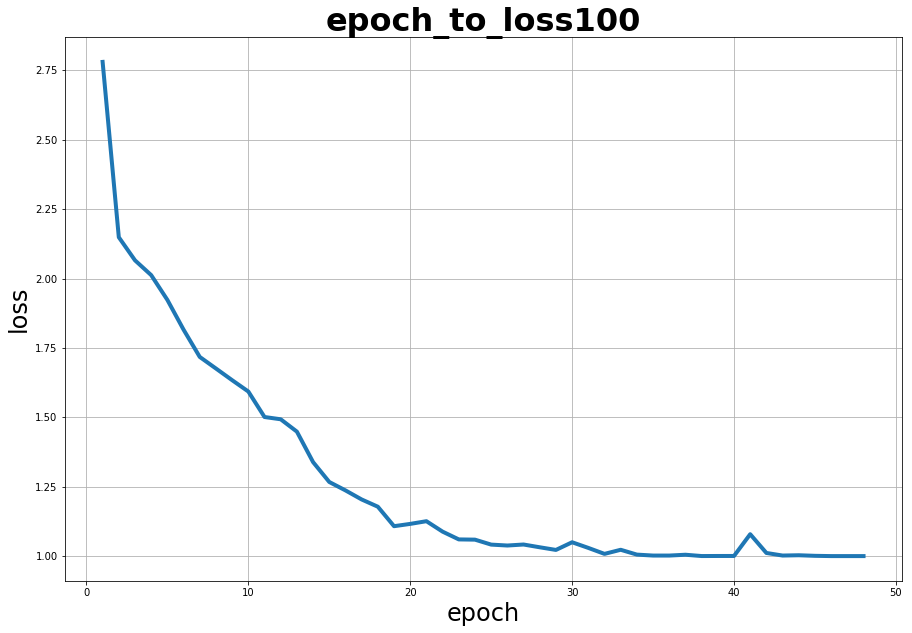

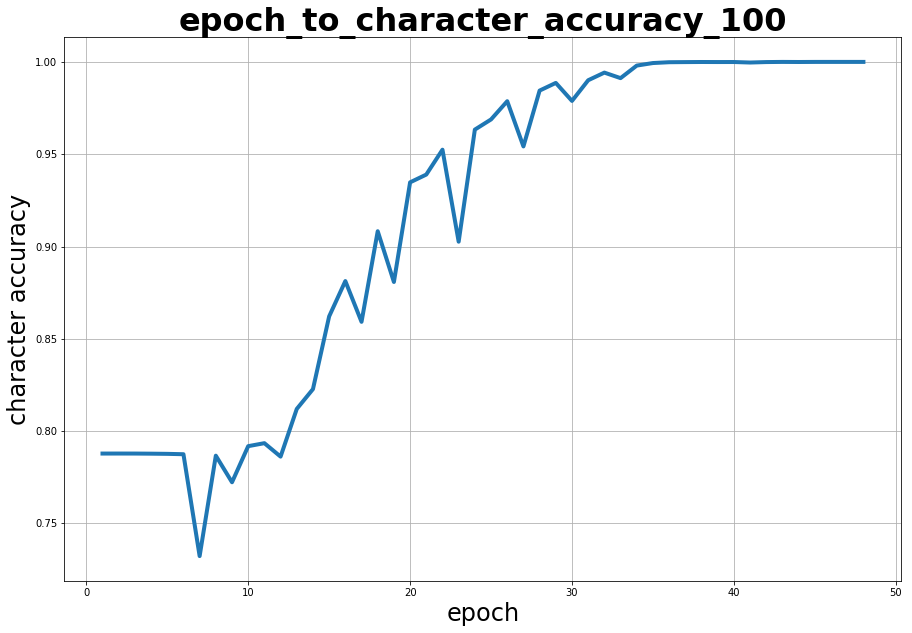

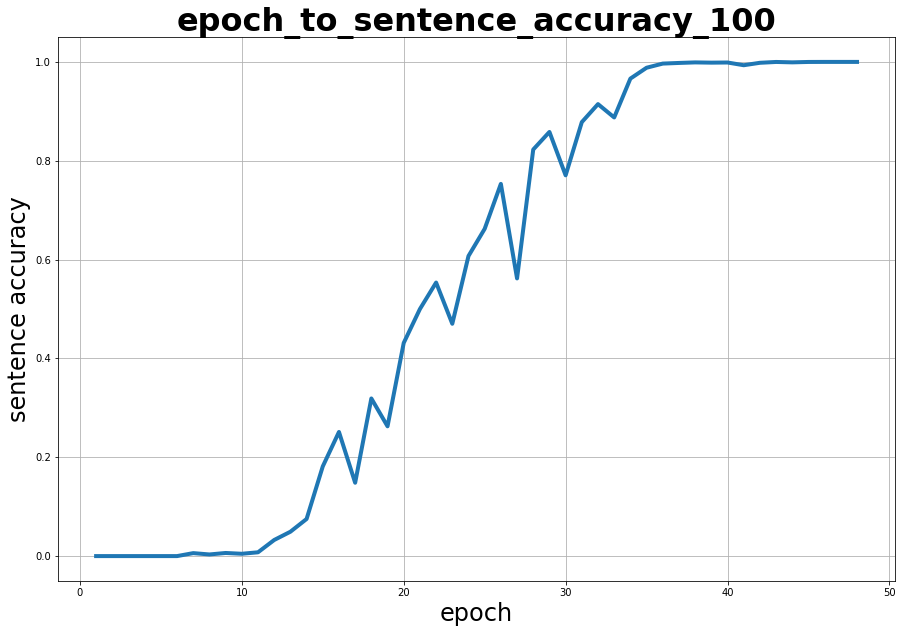

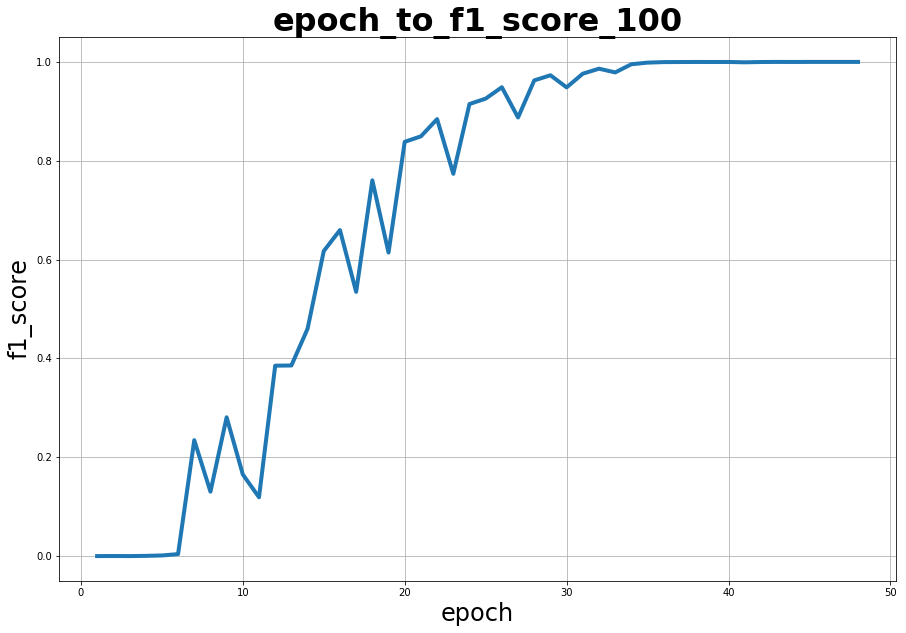

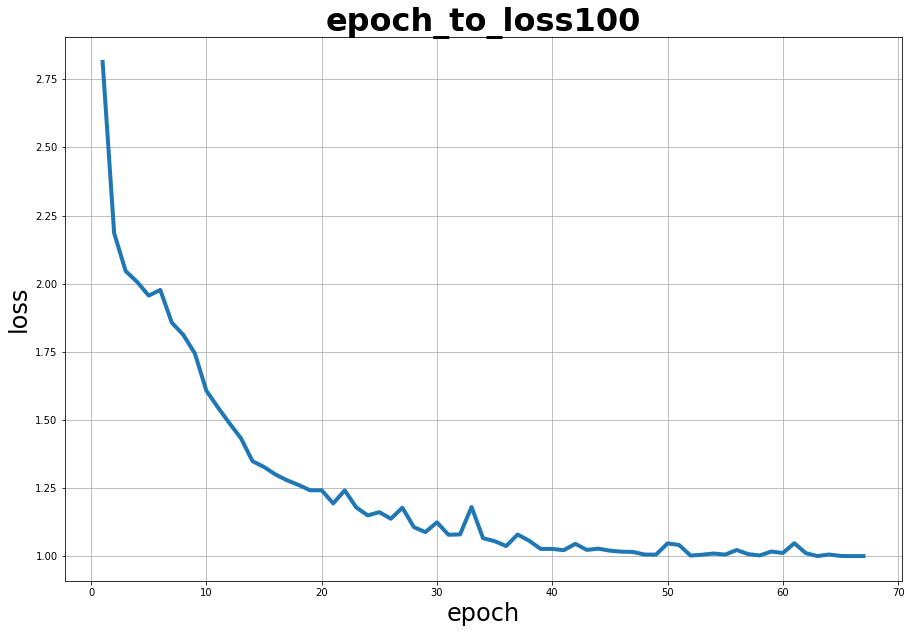

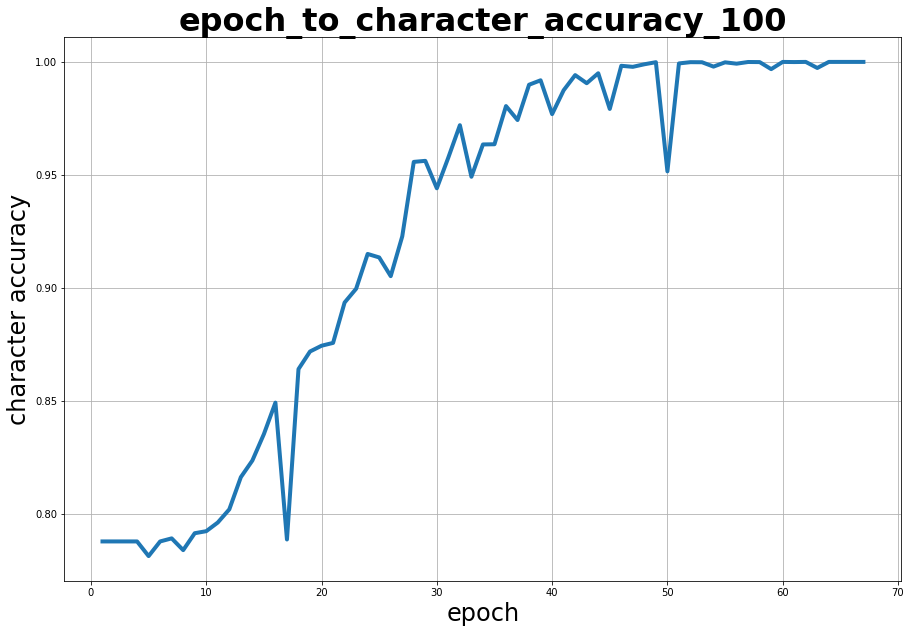

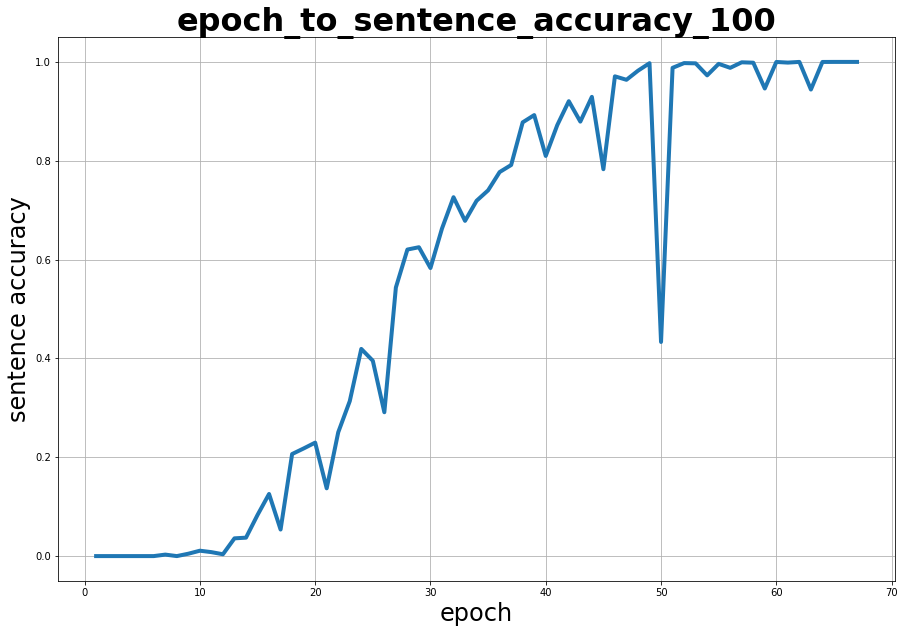

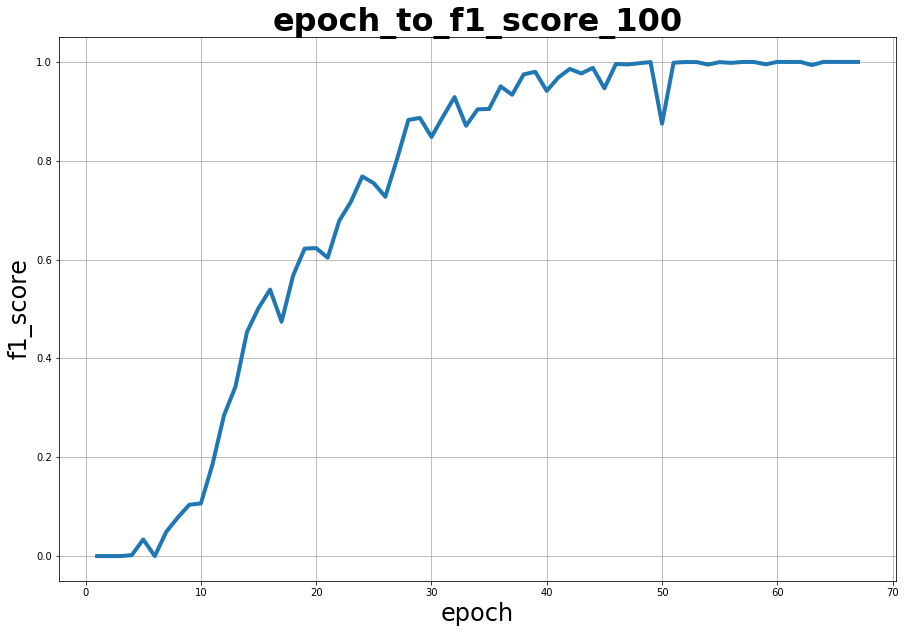

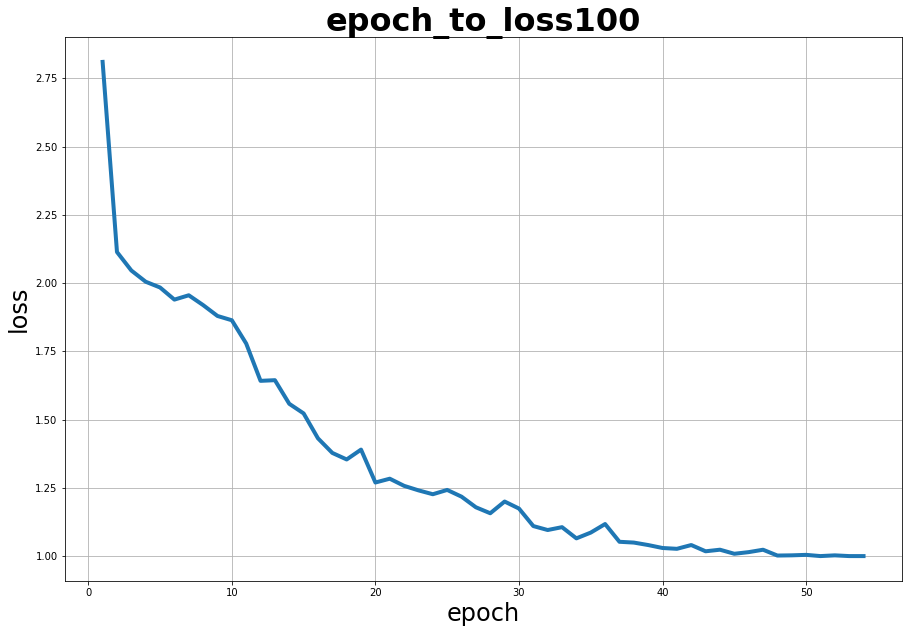

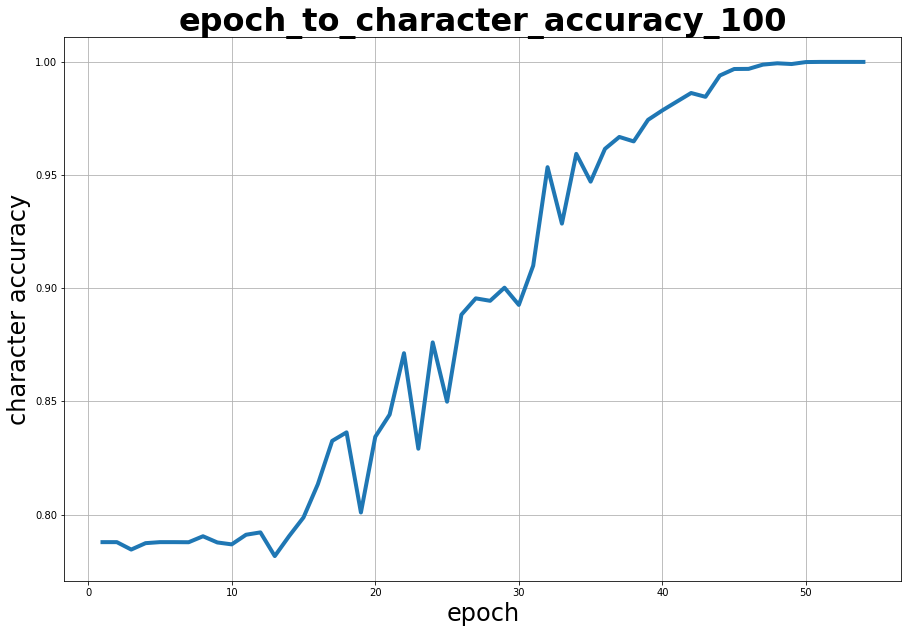

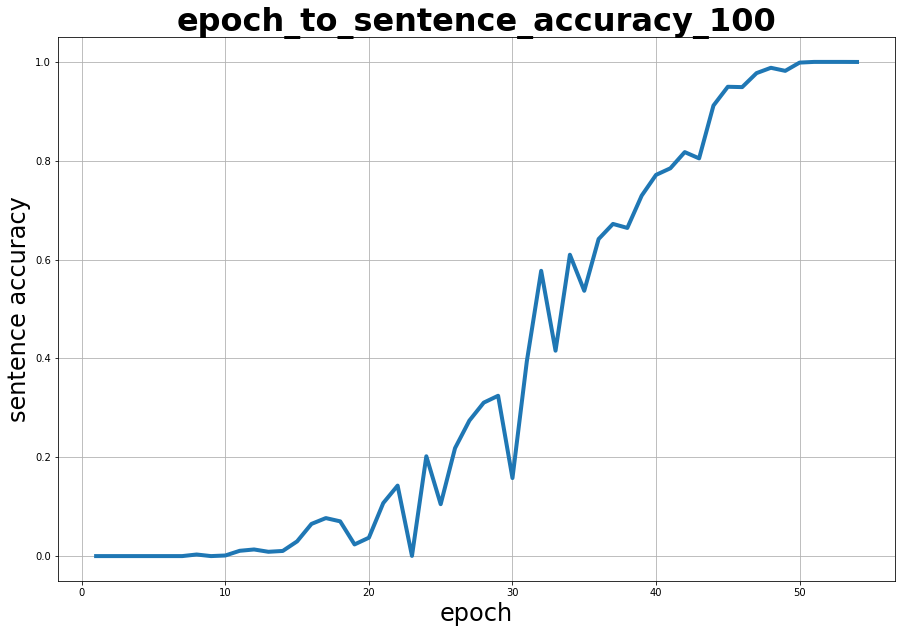

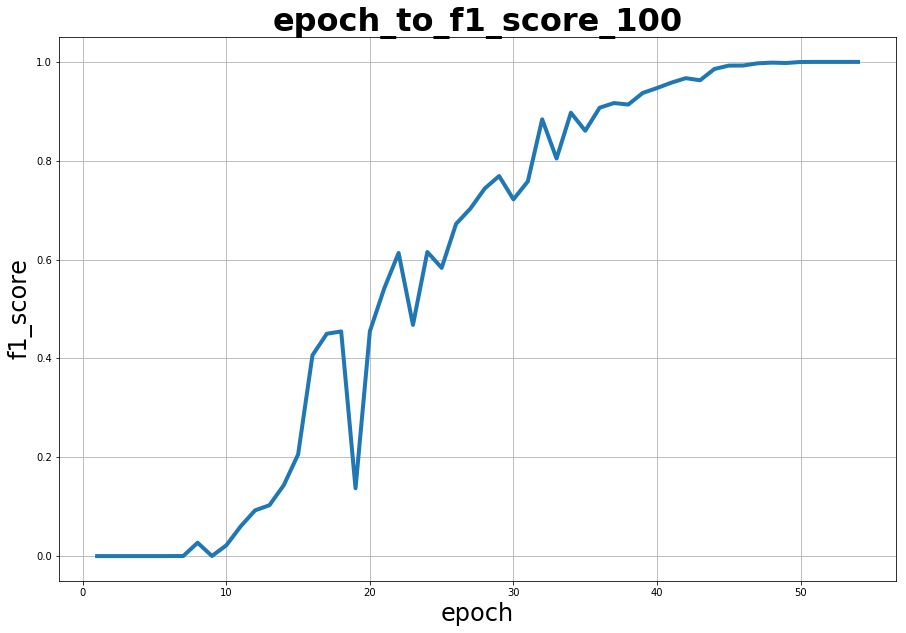

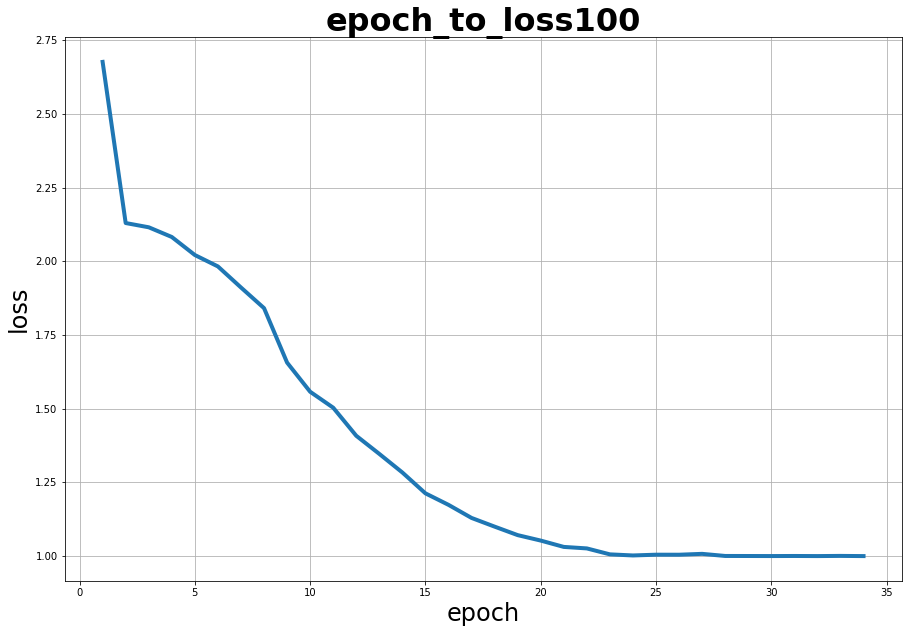

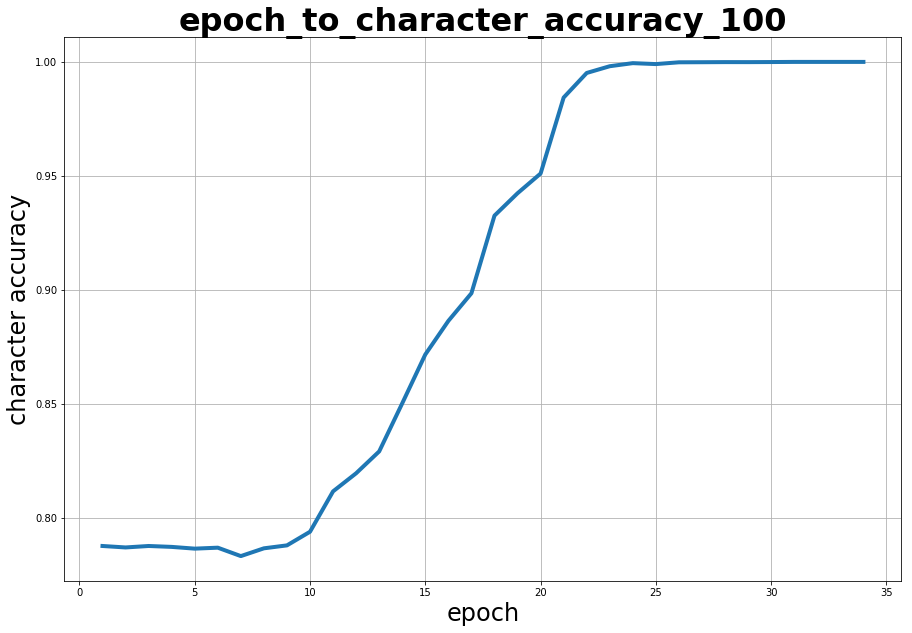

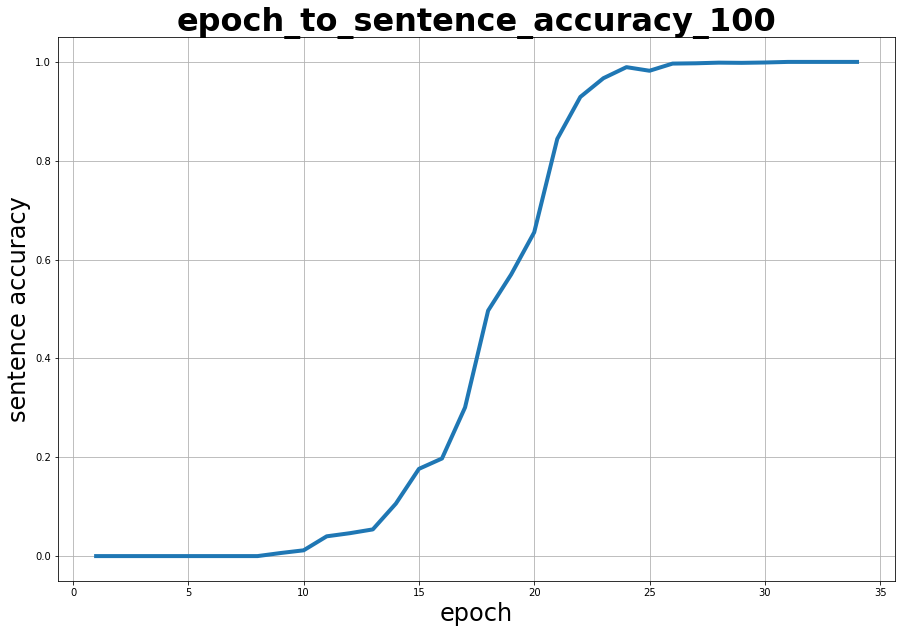

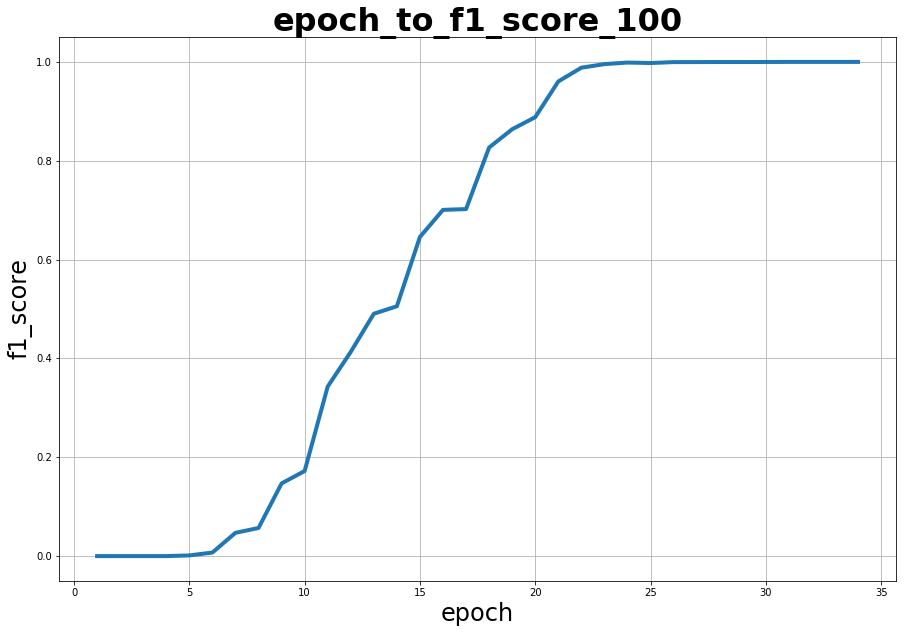

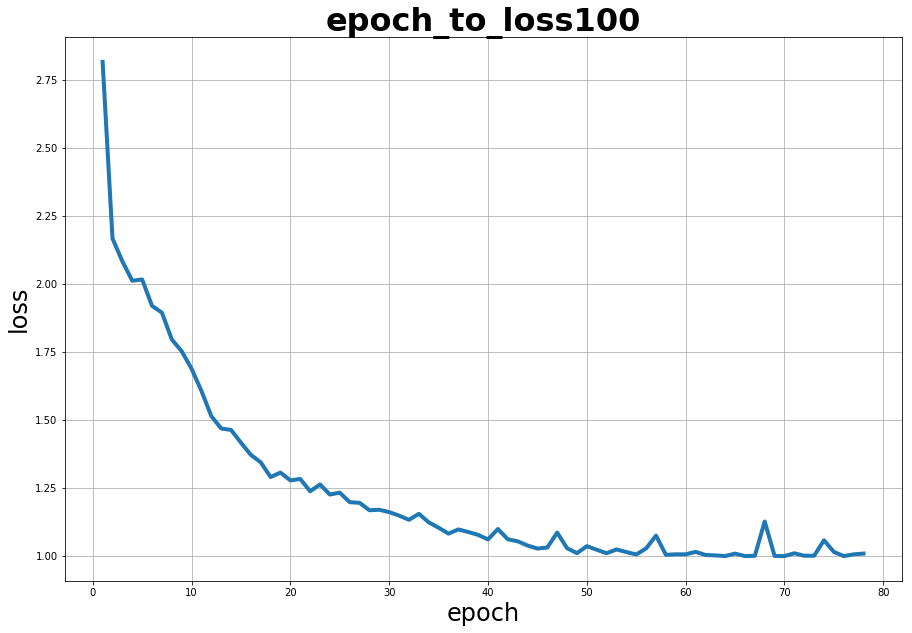

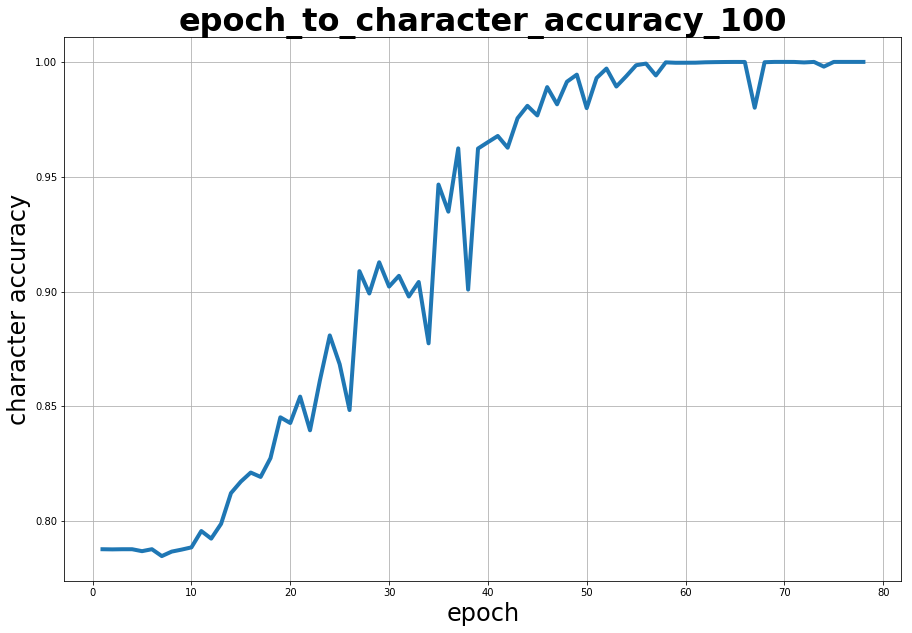

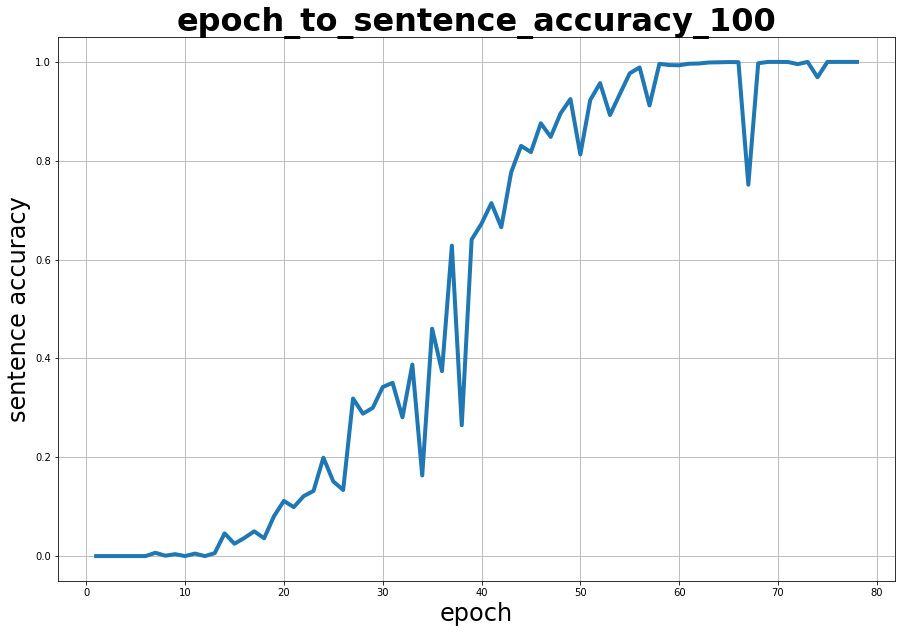

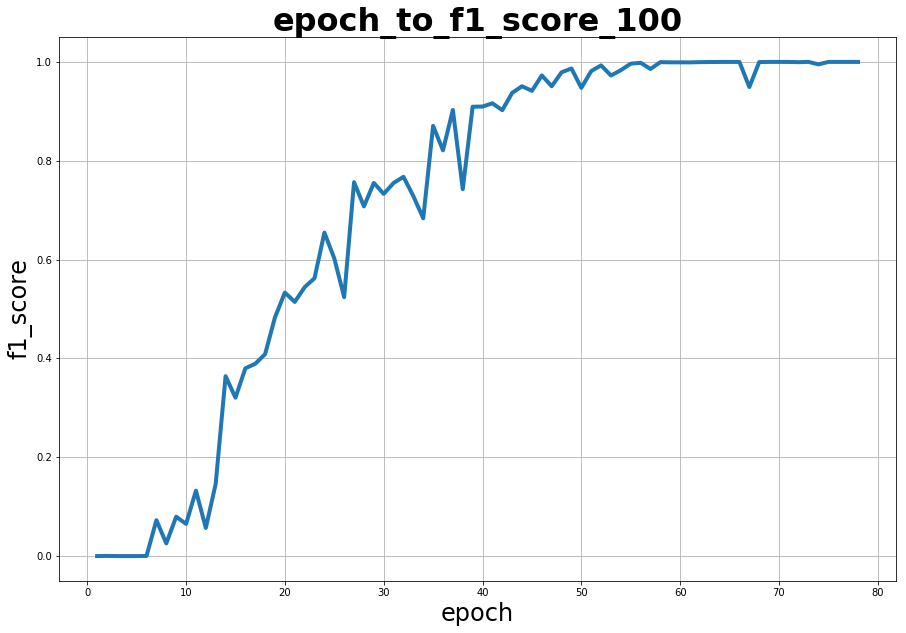

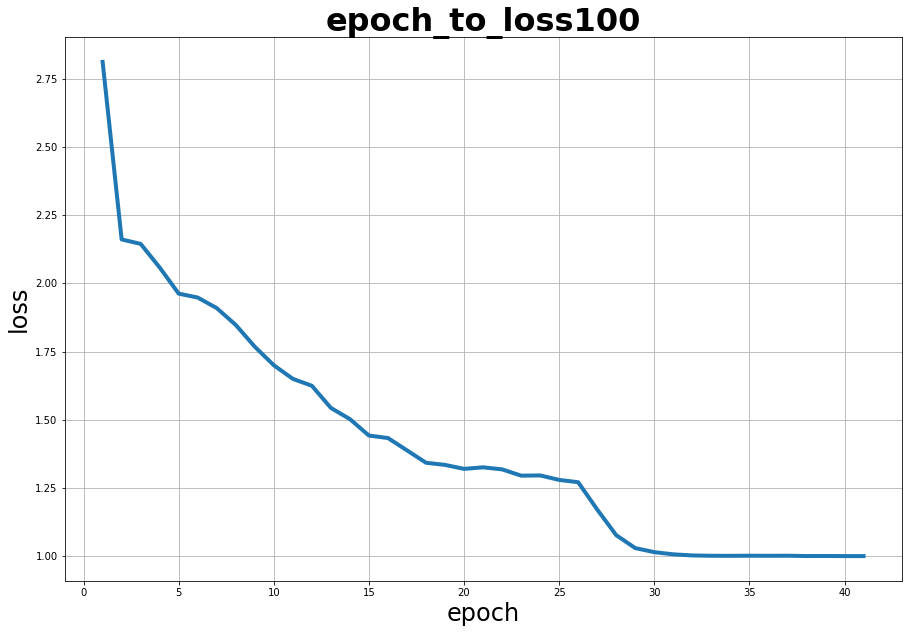

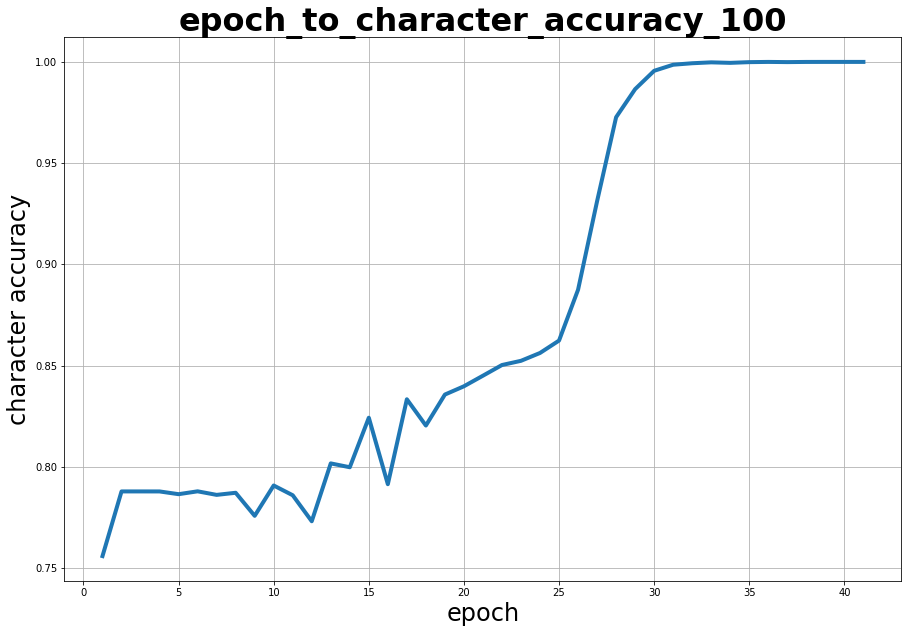

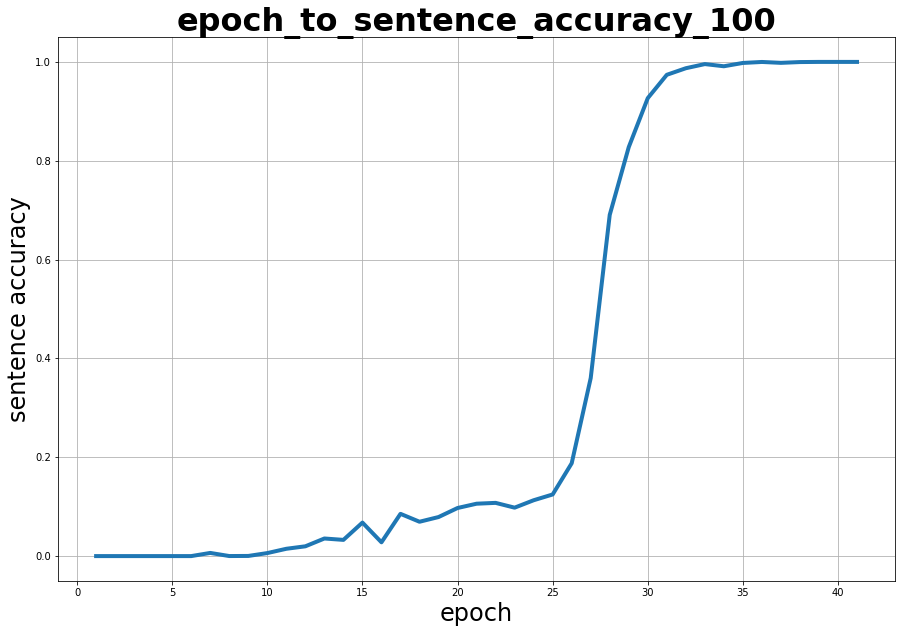

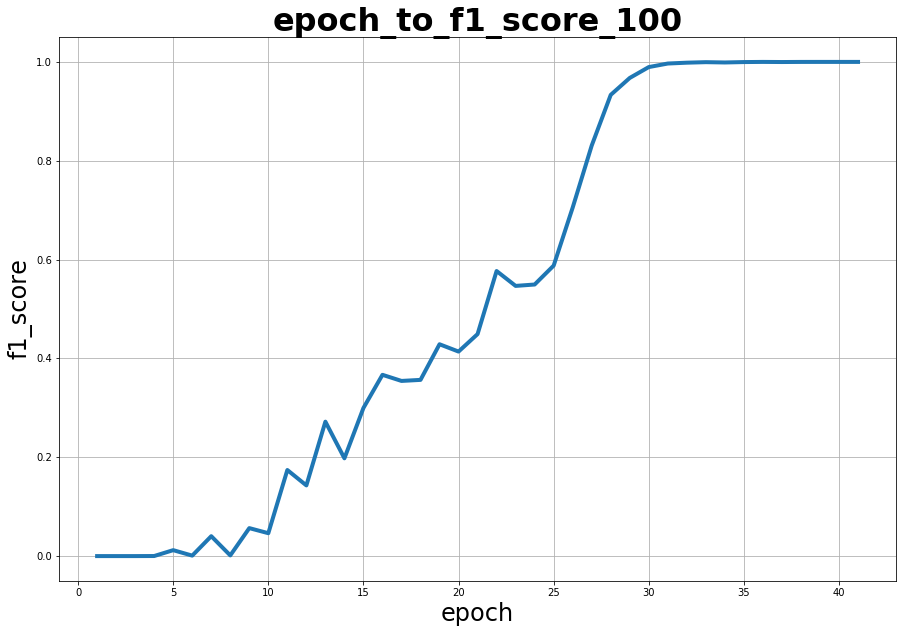

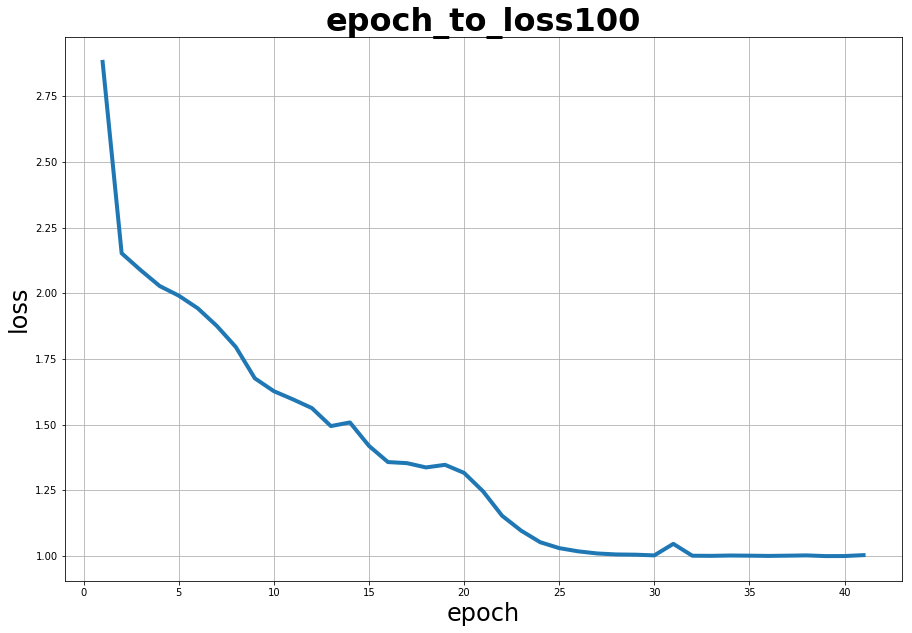

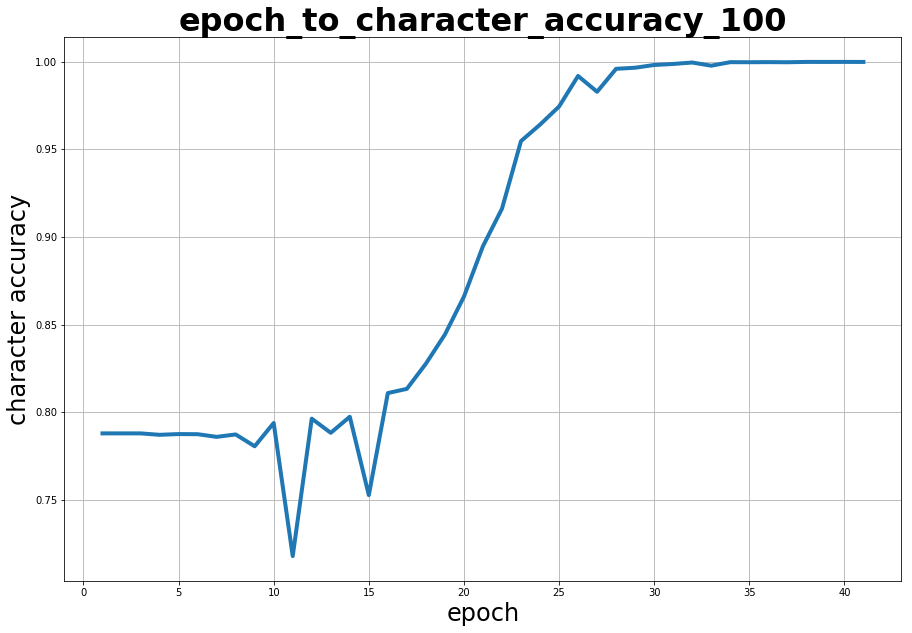

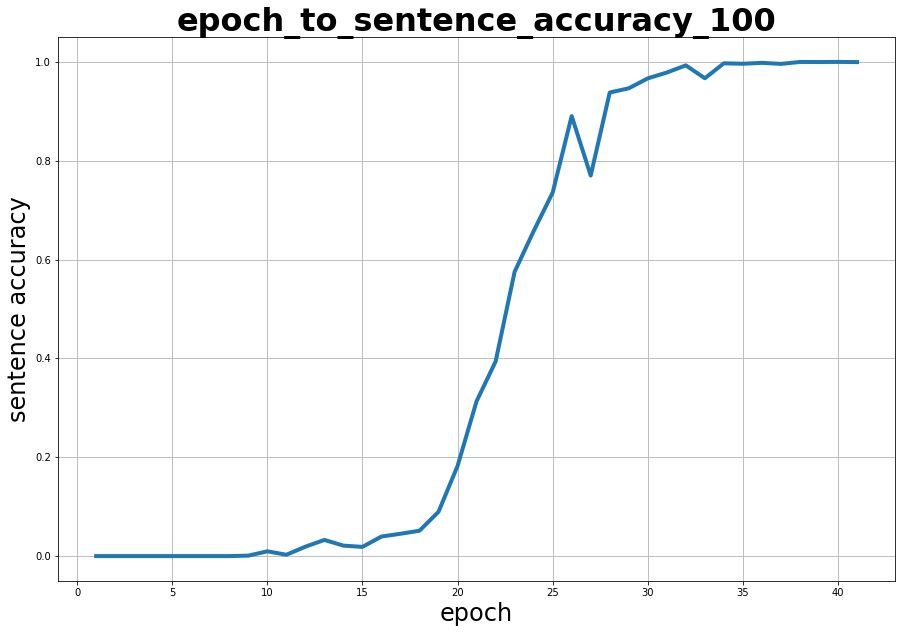

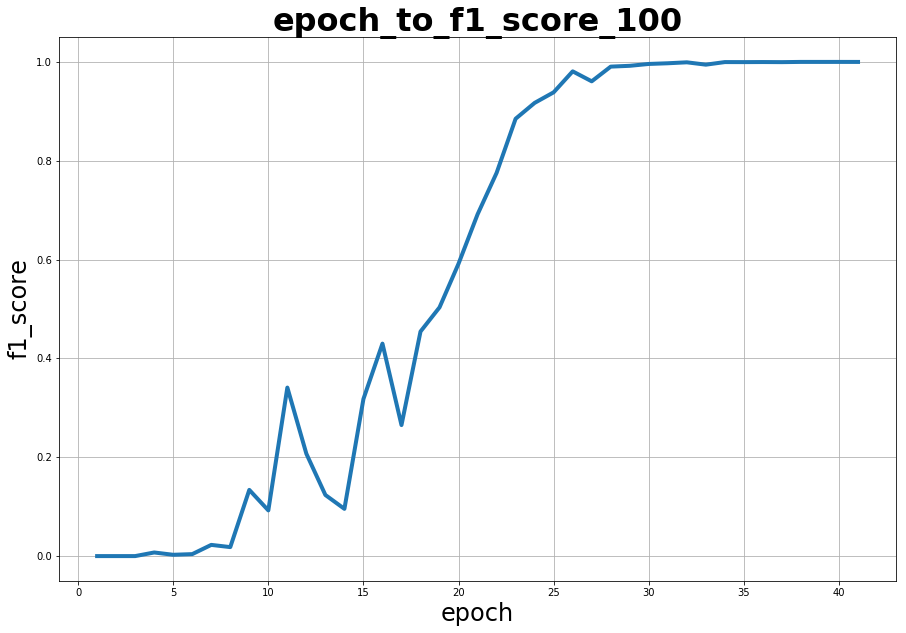

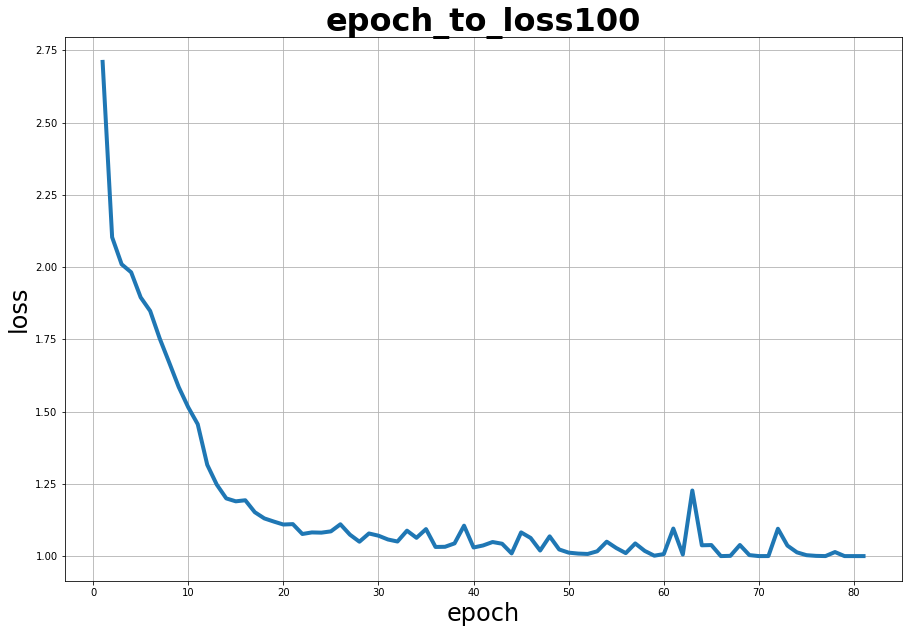

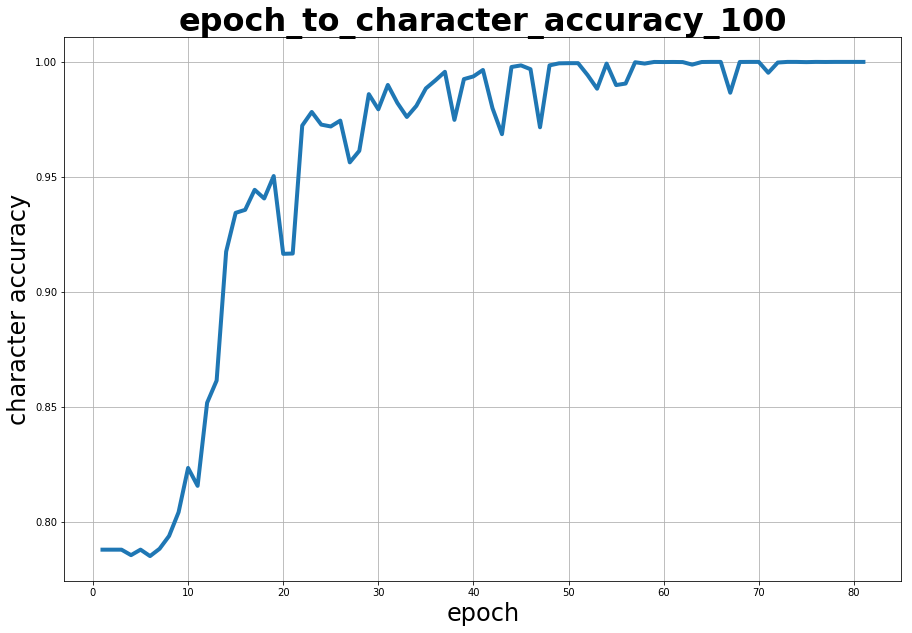

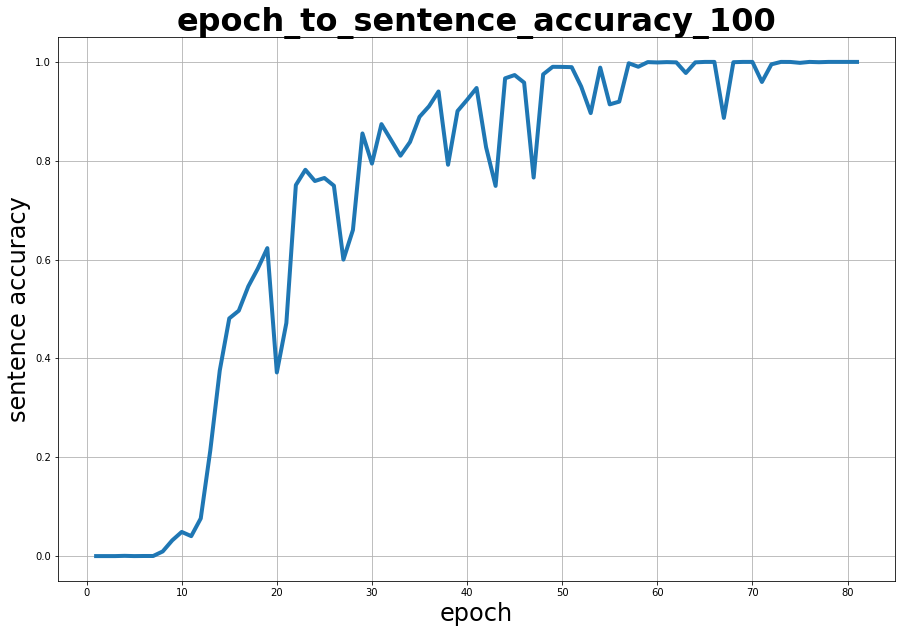

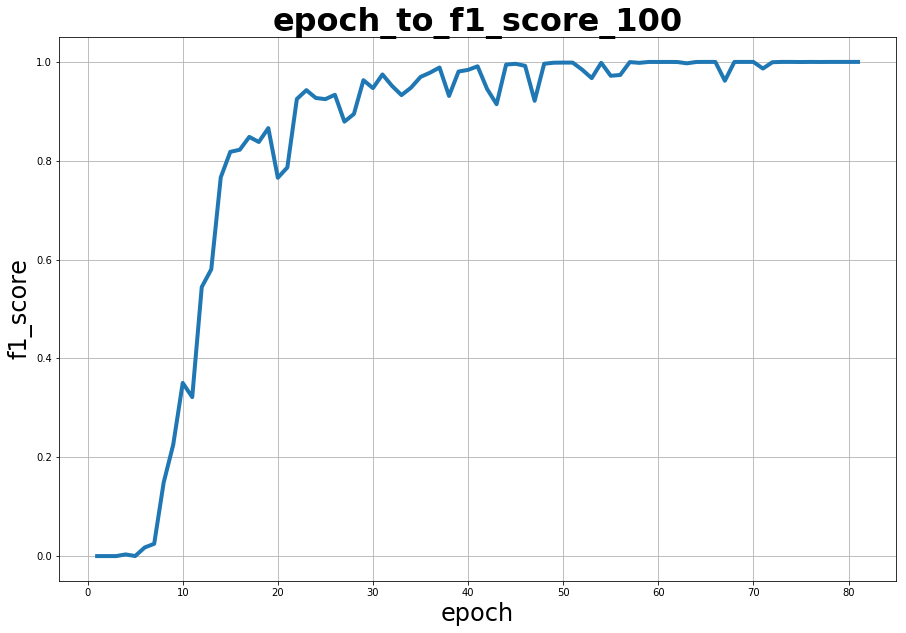

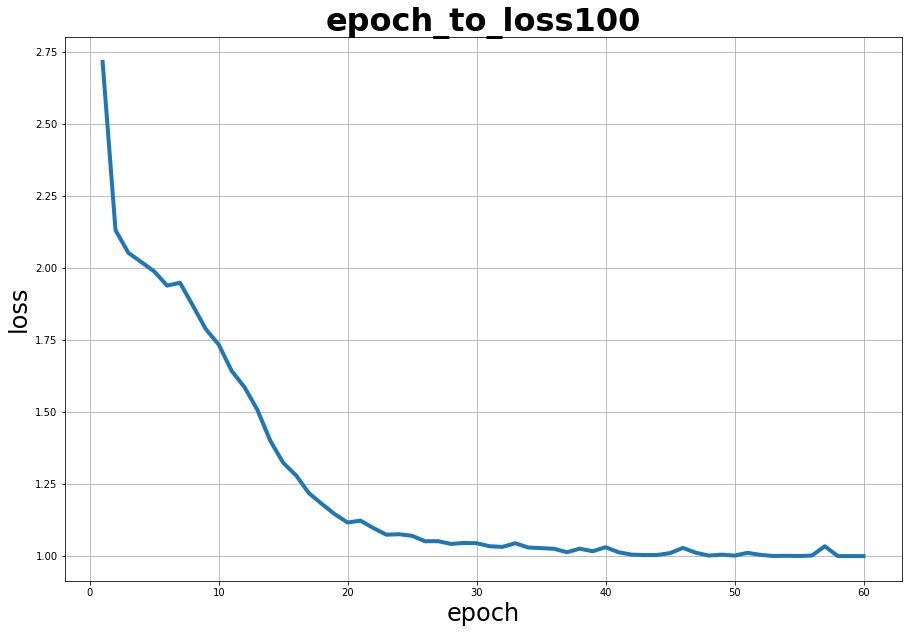

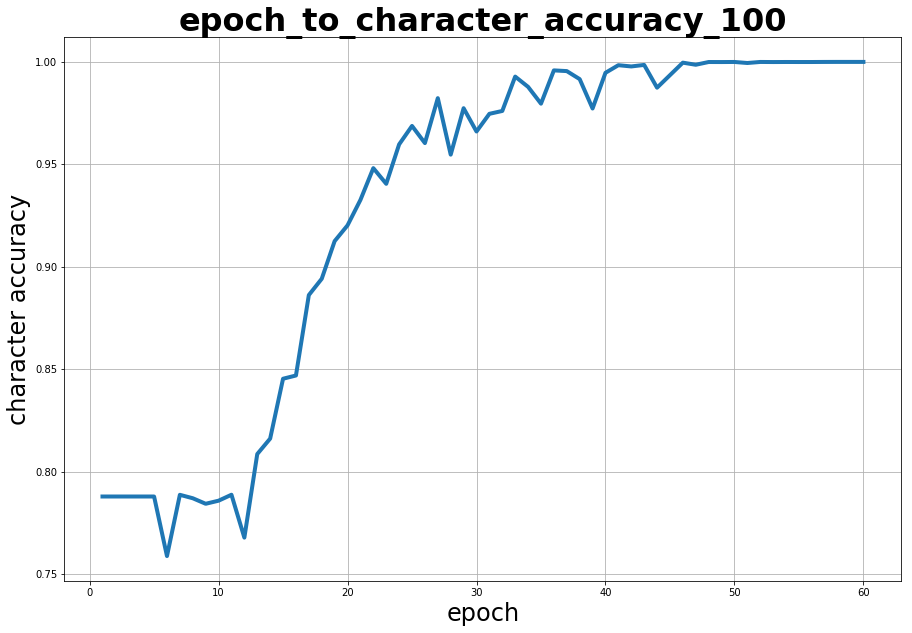

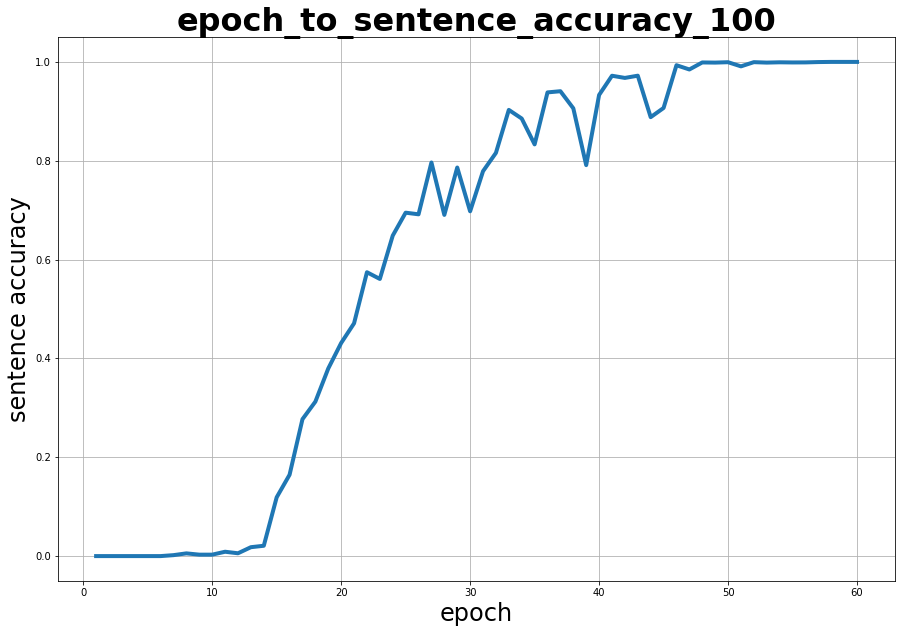

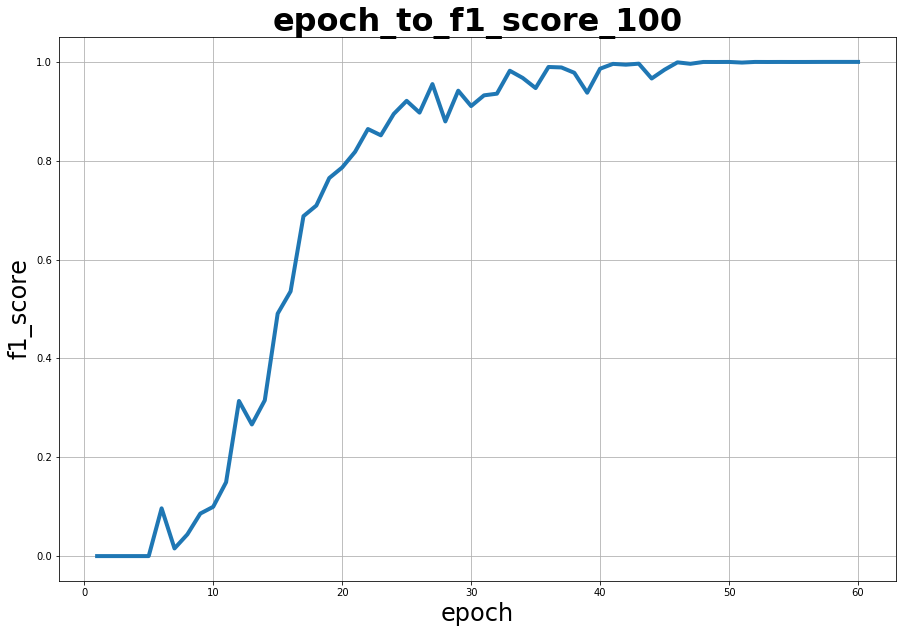

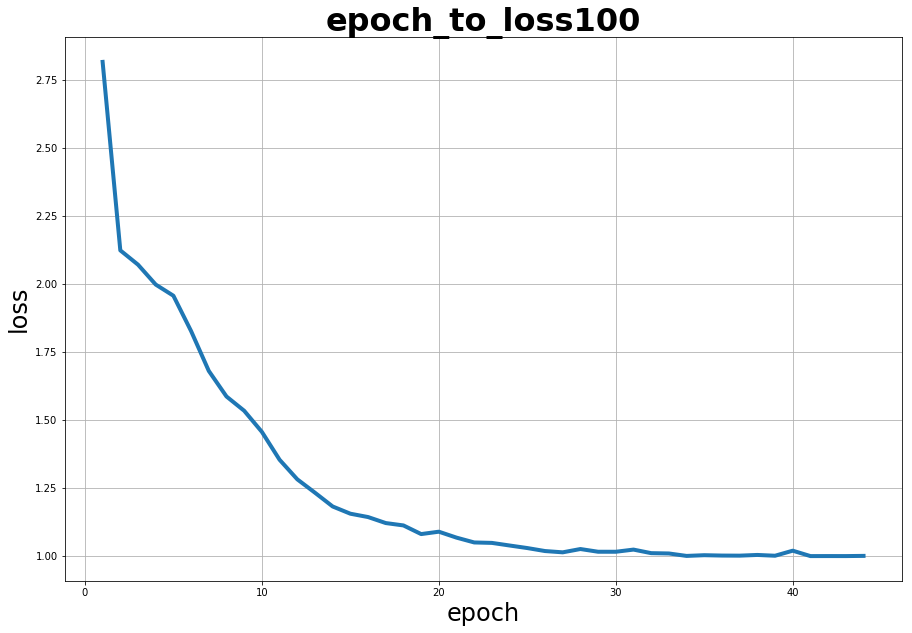

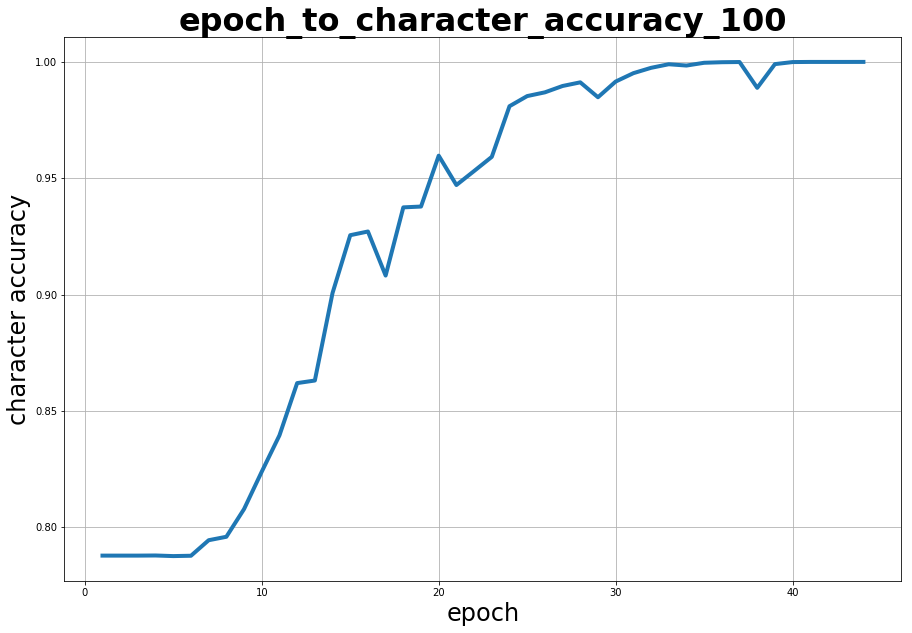

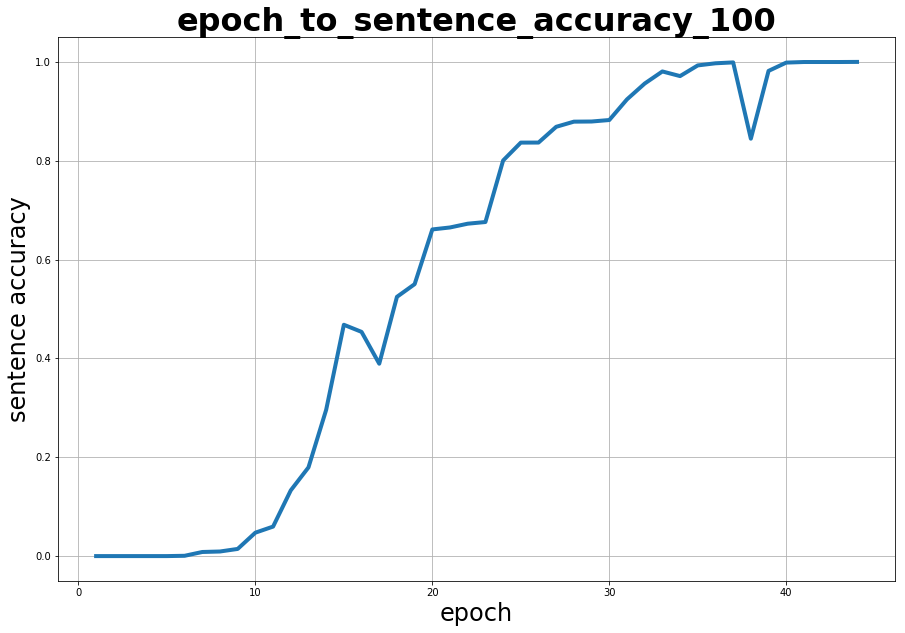

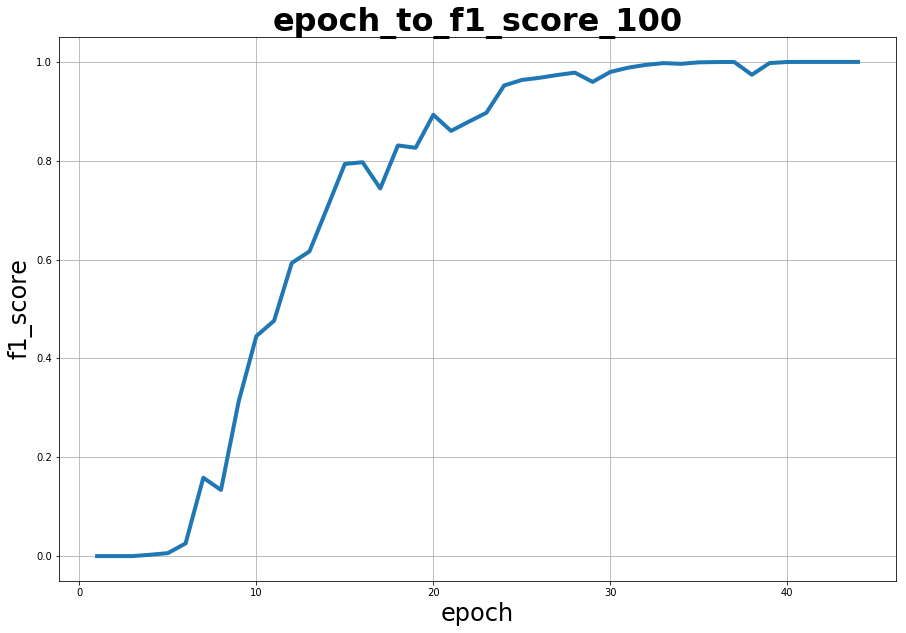

In [4]:
for i in iterator:
        print("rnn : %s" % rnn)
        max_len = 65
        src = fields.SourceField()
        srcp = fields.SourceField()
        tgt = fields.TargetField()
        tgtp = fields.TargetField()
        def len_filter(example):
            return len(example.src) <= max_len and len(example.tgt) <= max_len
        train = torchtext.data.TabularDataset(
            path=train_path, format='tsv',
            fields=[('src', src), ('tgt', tgt)],
            filter_pred=len_filter
        )
        dev = torchtext.data.TabularDataset(
            path=dev_path, format='tsv',
            fields=[('src', src), ('tgt', tgt)],
            filter_pred=len_filter
        )
        src.build_vocab(train)
        tgt.build_vocab(train)
        input_vocab = src.vocab
        output_vocab = tgt.vocab

        print("src vocab size = %d" % (len(src.vocab)))
        print("tat vacab size = %d" % (len(tgt.vocab)))

        weight = torch.ones(len(tgt.vocab))
        pad = tgt.vocab.stoi[tgt.pad_token]
        loss = Perplexity(weight, pad)
        if torch.cuda.is_available():
            loss.cuda()
        '''
        {
            "max_len": 104,
            "embedding_size": 5,
            "hidden_size": 200,
            "input_dropout_p": 0,
            "dropout_p": 0,
            "n_layers": 1,
            "bidirectional": false,
            "rnn_cell": "lstm",
            "variable_lengths": false,
            "embedding": null,
            "update_embedding": true,
            "get_context_vector": false,
            "use_attention": true,
            "attn_layers": 1,
            "hard_attn": false,
            "position_embedding": false,
            "pos_add": "add"
        }

        '''

        optimizer = "Adam"
        seq2seq = None
        config_json = open(config_path).read()
        config = json.loads(config_json)
        config["max_len"] = max_len
        config["hidden_size"] = 100
        config["rnn_cell"] = rnn
        config["embedding_size"] = 20
        config["use_attention"] = True
        config["position_embedding"] = "length"
        config["use_memory"] = "queue"
        #config["pos_add"] = "cat"

        print("Train_path : %s" % train_path)
        print("Dev_path = %s" % dev_path)
        print(json.dumps(config, indent=4))

        save_path = (data_name + "_rand_" + dir_name
                        + ("_att" if config["use_attention"] else "")
                        + ("_with_pos_" + config["position_embedding"] if config["position_embedding"] is not None else "")
                        + ("_cat" if config["pos_add"] == "cat" else "")
                        + ("_use_stack" if config["use_memory"] == "stack" else "")
                        + ("_use_queue" if config["use_memory"] == "queue" else "")
                        + "_emb" + str(config["embedding_size"])
                        + "_hidden" + str(config["hidden_size"])
                        + ("_pretrained" if pretrained_dir_name is not None else ""))
        print("Save_path : %s" % save_path)
        
        if pretrained_dir_name is not None:
            pretrained_path = ("pretrained_weights/"+ data_name + "_rand_" + pretrained_dir_name
                        + ("_att" if config["use_attention"] else "")
                        + ("_with_pos_" + config["position_embedding"] if config["position_embedding"] is not None else "")
                        + ("_cat" if config["pos_add"] == "cat" else "")
                        + ("_use_stack" if config["use_memory"] == "stack" else "")
                        + ("_use_queue" if config["use_memory"] == "queue" else "")
                        + "_emb" + str(config["embedding_size"])
                        + "_hidden" + str(config["hidden_size"])
                        + "_"+rnn+"_"+str(i))
            pretrained_pos_weight = np.load(pretrained_path+"/decoder_pos_weight.npy")
            seq2seq = Seq2seq(config, len(src.vocab), len(tgt.vocab), tgt.sos_id, tgt.eos_id,
                              pretrained_pos_weight)
        else :
            seq2seq = Seq2seq(config, len(src.vocab), len(tgt.vocab), tgt.sos_id, tgt.eos_id)
        
        if torch.cuda.is_available():
            seq2seq.cuda()

        for param in seq2seq.parameters():
            param.data.uniform_(-0.08, 0.08)

        # train
        t = Trainer(loss=loss, batch_size=128,
                    learning_rate=0.002,
                    checkpoint_every=50,
                    print_every=100,
                    hidden_size=config["hidden_size"],
                    path=save_path,
                    file_name=config["rnn_cell"] + "_" + str(i))

        seq2seq, ave_loss, character_accuracy_list, sentence_accuracy_list, f1_score_list = t.train(seq2seq, train,
                                                                                 num_epochs=epochs, dev_data=dev,
                                                                                 optimizer=optimizer,
                                                                                 teacher_forcing_ratio=0.5)

        character_accuracy.append(character_accuracy_list)
        sentence_accuracy.append(sentence_accuracy_list)
        f1_score.append(f1_score_list)
        best_f1_score.append(max(f1_score_list))

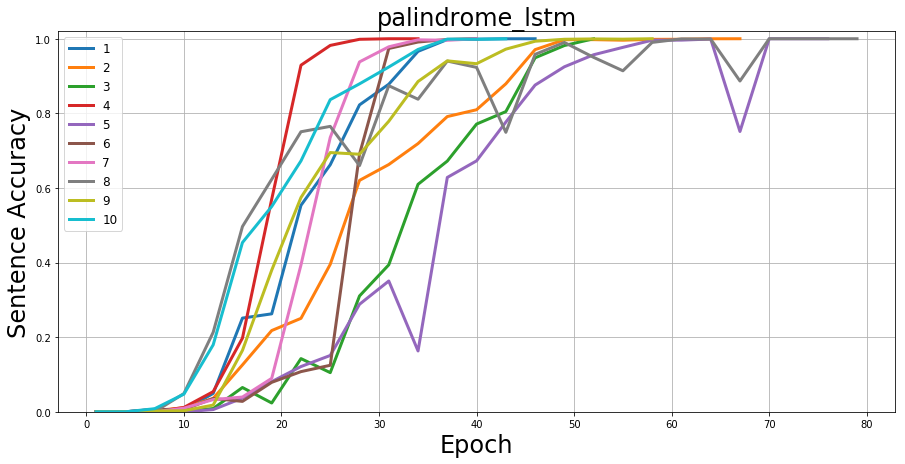

In [5]:
plt.figure(figsize=(15,7))
for j in range(len(sentence_accuracy)):
    plt.plot(list(range(1, len(sentence_accuracy[j])+1, 1))[::3], sentence_accuracy[j][::3], '-', LineWidth=3, label=str(j+1))

plt.legend(loc="best", fontsize=12)
plt.title(data_name+"_"+rnn, fontsize=24)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Sentence Accuracy', fontsize=24)
plt.ylim([0, 1.02])
plt.grid()
#plt.savefig('')

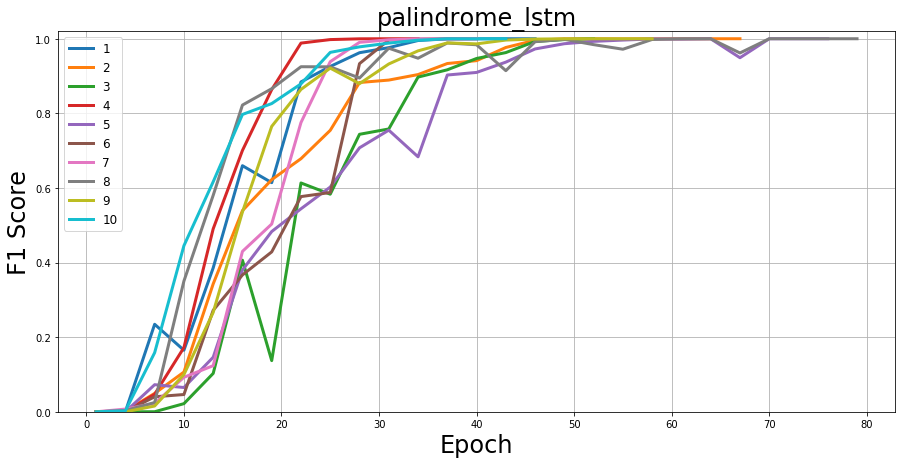

In [6]:
plt.figure(figsize=(15,7))
for j in range(len(f1_score)):
    plt.plot(list(range(1, len(f1_score[j])+1, 1))[::3], f1_score[j][::3], '-', LineWidth=3, label=str(j+1))

plt.legend(loc="best", fontsize=12)
plt.title(data_name+"_"+rnn, fontsize=24)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('F1 Score', fontsize=24)
plt.ylim([0, 1.02])
plt.grid()
#plt.savefig('')

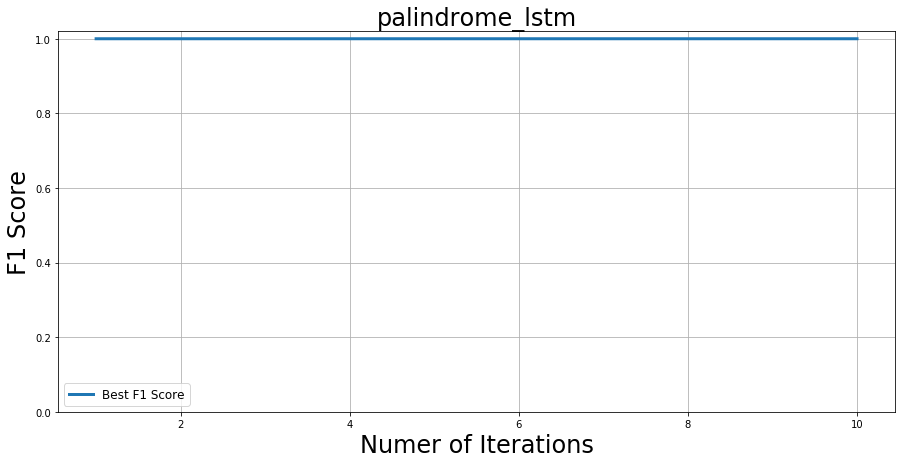

In [7]:
plt.figure(figsize=(15,7))
plt.plot(list(range(1, len(best_f1_score)+1)), best_f1_score, '-', LineWidth=3, label="Best F1 Score")

plt.legend(loc="best", fontsize=12)
plt.xlabel('Numer of Iterations', fontsize=24)
plt.title(data_name+"_"+rnn, fontsize=24)
plt.ylabel('F1 Score', fontsize=24)
plt.ylim([0, 1.02])
plt.grid()
#plt.savefig('')

In [8]:
print(f1_score)

[[0, 0.0001352234567622997, 0, 0.0004502273648192338, 0.0012585683784694908, 0.004029099048684947, 0.23458035839730243, 0.13036259026142022, 0.2808462344313816, 0.1650981957831898, 0.11903986981285597, 0.3853100863092459, 0.3857005597157193, 0.4600480817104571, 0.6172568629451985, 0.6596820120165124, 0.5346362717858044, 0.7603383808896783, 0.6142278057988055, 0.838296180206311, 0.8493800439783102, 0.8842122256944845, 0.7736022572891629, 0.9148262897339493, 0.9257256174508744, 0.9487514019547254, 0.8875430305151992, 0.9625396679391068, 0.9729876353443795, 0.94848755058646, 0.9761771075639689, 0.9862664622045824, 0.9787458927873899, 0.995252091340719, 0.9985458726454973, 0.9996054960042381, 0.9997633296142273, 0.9998872909246652, 0.9998309306703035, 0.999864746060729, 0.9991992330682907, 0.9997971876690103, 0.9999887302356508, 0.9998872934652752, 0.9999887302356508, 1.0, 1.0, 1.0], [0, 0, 0, 0.0017996535666884126, 0.03368587608261159, 4.507448558743323e-05, 0.049318679449841626, 0.078152

In [9]:
print(best_f1_score)

[1.0, 1.0, 0.9999887304896603, 1.0, 1.0, 1.0, 0.9999887304896603, 1.0, 1.0, 1.0]


In [10]:
print(sum(best_f1_score, 0.0)/len(best_f1_score))

0.999997746097932
